In [ ]:
import pandas as pd

# Loading the dataset
data = pd.read_csv("parking_data.csv", encoding="utf-8")
print(data.head(499))

    Parking_Spot_ID           Entry_Time            Exit_Time
0            Spot_2  2025-01-03 18:44:32  2025-01-03 23:44:32
1           Spot_15  2025-01-14 21:15:16  2025-01-15 00:15:16
2            Spot_3  2025-01-02 04:55:55  2025-01-02 12:55:55
3           Spot_19  2025-01-29 06:31:52  2025-01-29 07:31:52
4           Spot_16  2025-01-16 04:08:44  2025-01-16 09:08:44
..              ...                  ...                  ...
494          Spot_8  2025-01-02 03:06:45  2025-01-02 05:06:45
495         Spot_20  2025-01-25 13:54:38  2025-01-25 21:54:38
496          Spot_2  2025-01-24 23:41:27  2025-01-25 00:41:27
497         Spot_10  2025-01-21 17:03:43  2025-01-21 18:03:43
498         Spot_10  2025-01-04 01:02:00  2025-01-04 08:02:00

[499 rows x 3 columns]


In [ ]:
#Converting date columns to datetime:
data['Entry_Time'] = pd.to_datetime(data['Entry_Time'])
data['Exit_Time'] = pd.to_datetime(data['Exit_Time'])

# Calculate the parking duration for each row
data['Duration'] = (data['Exit_Time'] - data['Entry_Time']).dt.total_seconds() / 3600  # duration in hours

print(data.head(300))

    Parking_Spot_ID          Entry_Time           Exit_Time  Duration
0            Spot_2 2025-01-03 18:44:32 2025-01-03 23:44:32       5.0
1           Spot_15 2025-01-14 21:15:16 2025-01-15 00:15:16       3.0
2            Spot_3 2025-01-02 04:55:55 2025-01-02 12:55:55       8.0
3           Spot_19 2025-01-29 06:31:52 2025-01-29 07:31:52       1.0
4           Spot_16 2025-01-16 04:08:44 2025-01-16 09:08:44       5.0
..              ...                 ...                 ...       ...
295         Spot_18 2025-01-20 18:05:54 2025-01-20 22:05:54       4.0
296          Spot_7 2025-01-22 04:17:05 2025-01-22 05:17:05       1.0
297         Spot_11 2025-01-23 09:58:12 2025-01-23 12:58:12       3.0
298         Spot_12 2025-01-29 12:12:10 2025-01-29 15:12:10       3.0
299          Spot_2 2025-01-21 19:30:43 2025-01-22 02:30:43       7.0

[300 rows x 4 columns]


In [ ]:
#Calculating the average parking duration:
avg_duration = data['Duration'].mean()
print(f"Average Parking Duration: {avg_duration:.2f} hours")

# Utilization rate for each parking spot (percentage of time it was occupied)
parking_utilization = data.groupby('Parking_Spot_ID')['Duration'].sum() / (data['Exit_Time'].max() - data['Entry_Time'].min()).total_seconds() * 100
print(parking_utilization)

# Peak hours of parking usage
data['Hour'] = data['Entry_Time'].dt.hour
peak_hours = data.groupby('Hour').size()
print("Peak Hours of Parking Usage:")
print(peak_hours)


Average Parking Duration: 4.52 hours
Parking_Spot_ID
Spot_1     0.003263
Spot_10    0.003877
Spot_11    0.002533
Spot_12    0.003723
Spot_13    0.004146
Spot_14    0.003839
Spot_15    0.003915
Spot_16    0.004837
Spot_17    0.005259
Spot_18    0.005758
Spot_19    0.004722
Spot_2     0.005259
Spot_20    0.004722
Spot_3     0.003493
Spot_4     0.005374
Spot_5     0.005336
Spot_6     0.003570
Spot_7     0.004107
Spot_8     0.005297
Spot_9     0.003800
Name: Duration, dtype: float64
Peak Hours of Parking Usage:
Hour
0     31
1     21
2     23
3     17
4     19
5     19
6     25
7     17
8     14
9     22
10    22
11    25
12    26
13    27
14    12
15    20
16    12
17    20
18    17
19    17
20    25
21    26
22    19
23    24
dtype: int64


In [ ]:
data_cleaned = data.dropna(subset=['Entry_Time', 'Exit_Time'])

# Filter parking spots with high usage (e.g., spots that were used for more than 10 hours)
high_usage_spots = data.groupby('Parking_Spot_ID')['Duration'].sum()
high_usage_spots = high_usage_spots[high_usage_spots > 10]
print(f"Parking Spots with High Usage: {high_usage_spots}")

Parking Spots with High Usage: Parking_Spot_ID
Spot_1      85.0
Spot_10    101.0
Spot_11     66.0
Spot_12     97.0
Spot_13    108.0
Spot_14    100.0
Spot_15    102.0
Spot_16    126.0
Spot_17    137.0
Spot_18    150.0
Spot_19    123.0
Spot_2     137.0
Spot_20    123.0
Spot_3      91.0
Spot_4     140.0
Spot_5     139.0
Spot_6      93.0
Spot_7     107.0
Spot_8     138.0
Spot_9      99.0
Name: Duration, dtype: float64


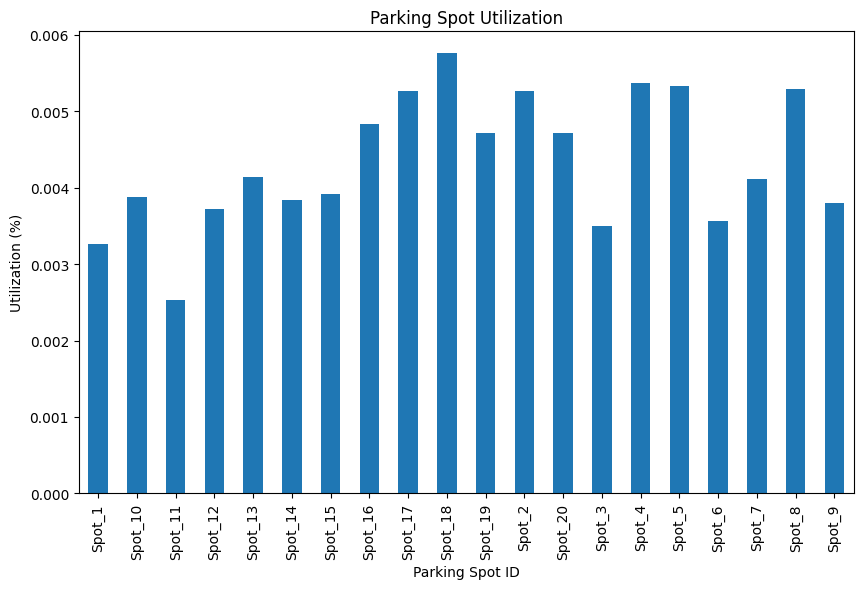

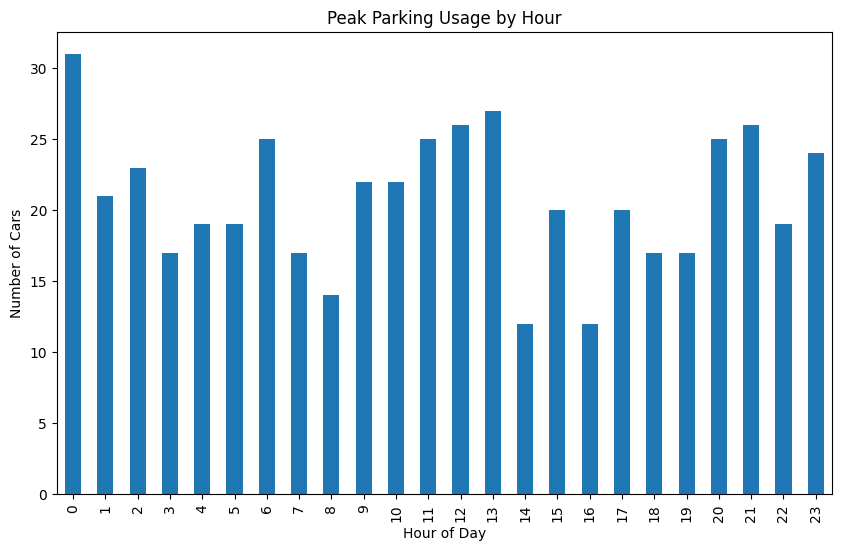

In [ ]:
import matplotlib.pyplot as plt

# Plot parking utilization
plt.figure(figsize=(10, 6))
parking_utilization.plot(kind='bar')
plt.title('Parking Spot Utilization')
plt.xlabel('Parking Spot ID')
plt.ylabel('Utilization (%)')
plt.show()

# Plot peak usage hours
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar')
plt.title('Peak Parking Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cars')
plt.show()